# Homework 5
### ASTROINFORMATICS

https://github.com/astromundus/astroinfo2018/homeworks/HW5.ipynb


## Problem

Below in the notebook is the code that generates Figure 10.17 in the textbook. As it is now, it:
* downloads a dataset of variable stars collected with the [LINEAR](https://en.wikipedia.org/wiki/Lincoln_Near-Earth_Asteroid_Research) telescope,
* selects six of them (as given by the `ids` variable),
* computes the Lomb-Scargle periodogram in the `compute_best_frequencies` function,
* finds the best frequency by looking for the highest peak in the periodiogram, and
* folds the light curves and plots the results.

Either by modifying the code below, or by writing similar code, do the following:

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range $0 < T < 25$ hours. What do you observe in the histogram?

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework! 

In [104]:
# Figure 10.17 code

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.decorators import pickle_results
from astroML.time_series import search_frequencies, lomb_scargle, MultiTermFit
from astroML.datasets import fetch_LINEAR_sample
import random

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Compute the best frequencies
# @pickle_results('LINEAR_LS.pkl')
def compute_best_frequencies(ids, n_eval=10000, n_retry=5, generalized=True):
    results = {}
    count=0
    for i in ids:
        count+=1
        t, y, dy = data[i].T
        print("%i - computing power for %i (%i points)" % (count,i, len(t)))
        kwargs = dict(generalized=generalized)
        omega, power = search_frequencies(t, y, dy, n_eval=n_eval,
                                          n_retry=n_retry,
                                          LS_kwargs=kwargs)
        results[i] = [omega, power]

    return results

# plot phased light curves 
def plot_lightcurves(results, ids):
    #------------------------------------------------------------
    # Plot the phased light-curves
    fig = plt.figure(figsize=(8, 12))
    fig.subplots_adjust(hspace=0.1, bottom=0.06, top=0.94, left=0.12, right=0.94)

    for i in range(len(ids)):
        # get the data and best-fit angular frequency
        t, y, dy = data[ids[i]].T
        omega, power = results[ids[i]]
        omega_best = omega[np.argmax(power)]
        print(" - omega_0 = %.10g" % omega_best)

        # do a fit to the first 4 Fourier components
        mtf = MultiTermFit(omega_best, 4)
        mtf.fit(t, y, dy)
        phase_fit, y_fit, phased_t = mtf.predict(1000, return_phased_times=True)

        # plot the phased data and best-fit curves
        ax = fig.add_subplot(321 + i)
        ax.errorbar(phased_t, y, dy, fmt='.k', ecolor='gray',
                    lw=1, ms=4, capsize=1.5)
        ax.plot(phase_fit, y_fit, '-b', lw=2)

        ax.set_xlim(0, 1)
        ax.set_ylim(plt.ylim()[::-1])
        ax.yaxis.set_major_locator(plt.MaxNLocator(4))

        ax.text(0.03, 0.04, "ID = %i" % ids[i], ha='left', va='bottom',
                transform=ax.transAxes)
        ax.text(0.03, 0.96, "P = %.2f hr" % (2 * np.pi / omega_best * 24.),
                ha='left', va='top',
                transform=ax.transAxes)

        ylim = ax.get_ylim()
        ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))

        if i < 4:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        if i % 2 == 0:
            ax.set_ylabel('mag')

        if i in (4, 5):
            ax.set_xlabel('phase')

    return fig

In [2]:
# Load the dataset
data = fetch_LINEAR_sample()

[14752041, 1009459, 10022663, 10025796, 11375941, 18525697]
1 - computing power for 14752041 (253 points)
2 - computing power for 1009459 (593 points)
3 - computing power for 10022663 (246 points)
4 - computing power for 10025796 (233 points)
5 - computing power for 11375941 (280 points)
6 - computing power for 18525697 (211 points)
 - omega_0 = 17.21695506
 - omega_0 = 51.10600808
 - omega_0 = 10.20062676
 - omega_0 = 45.55493503
 - omega_0 = 58.44512277
 - omega_0 = 10.82722772


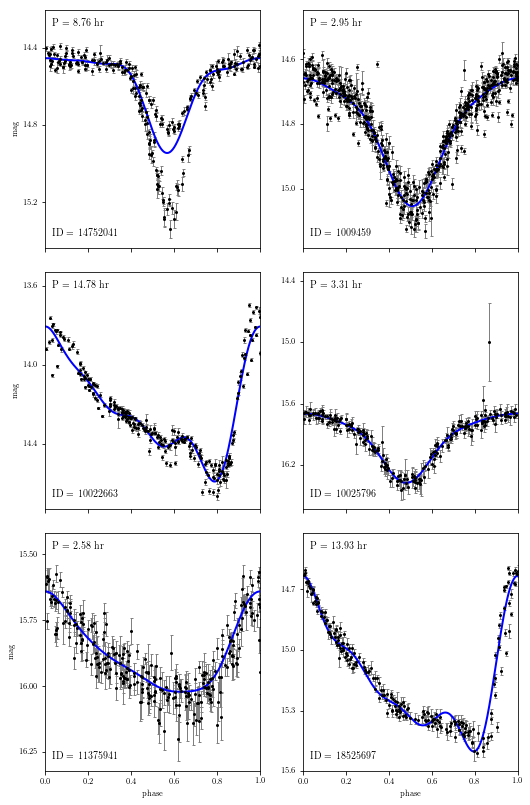

In [3]:
# select a subset of the full dataset
ids = [14752041, 1009459, 10022663, 10025796, 11375941, 18525697]
print(ids)

# Compute the best frequencies
res = compute_best_frequencies(ids, n_eval=10000, n_retry=5)

# Plot the phased light-curves
myprettyplot = plot_lightcurves(res, ids)

## Solution

1. Find the frequencies for the first 100 stars in the LINEAR datasets (i.e., those with IDs in `data.ids[:100]`, where `data` is the variable containing the LINEAR dataset as defined below).

In [4]:
results = compute_best_frequencies(data.ids[:100])
# myprettyplot = plot_lightcurves(results,data.ids[:2])

1 - computing power for 10003298 (196 points)
2 - computing power for 10004892 (269 points)
3 - computing power for 10013411 (170 points)
4 - computing power for 10021274 (214 points)
5 - computing power for 10022663 (246 points)
6 - computing power for 10025796 (233 points)
7 - computing power for 10028253 (38 points)
8 - computing power for 10030349 (255 points)
9 - computing power for 10032668 (193 points)
10 - computing power for 10038903 (227 points)
11 - computing power for 10040133 (257 points)
12 - computing power for 10040491 (228 points)
13 - computing power for 10045187 (229 points)
14 - computing power for 10045615 (101 points)
15 - computing power for 10046720 (136 points)
16 - computing power for 10047498 (221 points)
17 - computing power for 1004849 (607 points)
18 - computing power for 1005497 (607 points)
19 - computing power for 10064356 (291 points)
20 - computing power for 10066464 (274 points)
21 - computing power for 10071455 (269 points)
22 - computing power for 

In [8]:
omega_best=np.empty(len(data.ids[:100]))
for i in range(len(data.ids[:100])):
        # get the best-fit angular frequency
        omega, power = results[data.ids[i]]
        omega_best[i] = omega[np.argmax(power)]
        print("%d \t- omega_0 = %.10g" %(data.ids[i], omega_best[i]))

10003298 	- omega_0 = 50.68860719
10004892 	- omega_0 = 9.342274114
10013411 	- omega_0 = 11.31471267
10021274 	- omega_0 = 10.8907631
10022663 	- omega_0 = 10.20062676
10025796 	- omega_0 = 45.55493503
10028253 	- omega_0 = 7.535937452
10030349 	- omega_0 = 11.52701659
10032668 	- omega_0 = 17.53065289
10038903 	- omega_0 = 12.65024236
10040133 	- omega_0 = 10.29120901
10040491 	- omega_0 = 22.1463799
10045187 	- omega_0 = 11.03110337
10045615 	- omega_0 = 22.0396775
10046720 	- omega_0 = 10.0363784
10047498 	- omega_0 = 12.82060684
1004849 	- omega_0 = 13.70483127
1005497 	- omega_0 = 9.613121674
10064356 	- omega_0 = 10.00077894
10066464 	- omega_0 = 9.448396134
10071455 	- omega_0 = 21.38496118
10084768 	- omega_0 = 9.722971358
10085065 	- omega_0 = 18.61735151
10086396 	- omega_0 = 9.360612693
10089441 	- omega_0 = 20.98564547
1009459 	- omega_0 = 51.10600808
10099492 	- omega_0 = 33.36187931
10100966 	- omega_0 = 10.19760776
10101561 	- omega_0 = 44.9335195
10102166 	- omega_0 = 

2. Compute the periods corresponing to the frequencies above, and plot the histogram of periods using 50 bins in range  0<T<25  hours. What do you observe in the histogram?

__ANSWER2:__ `Plotting the histogram with 50 bins yeilds that we donot have any single distribution in the periods. And that there are multiple peaks associated with the periods. The highest peak is around 3 days while the second highest peak is around 15 days. This also classifies the stars into three kinds of variable stars, depending on their position in one of peaks the histogram.`

[  1.00933199   1.46563503   1.92193807   2.37824111   2.83454415
   3.29084719   3.74715024   4.20345328   4.65975632   5.11605936
   5.5723624    6.02866544   6.48496848   6.94127152   7.39757456
   7.85387761   8.31018065   8.76648369   9.22278673   9.67908977
  10.13539281  10.59169585  11.04799889  11.50430193  11.96060498
  12.41690802  12.87321106  13.3295141   13.78581714  14.24212018
  14.69842322  15.15472626  15.6110293   16.06733235  16.52363539
  16.97993843  17.43624147  17.89254451  18.34884755  18.80515059
  19.26145363  19.71775667  20.17405971  20.63036276  21.0866658
  21.54296884  21.99927188  22.45557492  22.91187796  23.368181
  23.82448404]
[  2.   0.   0.   4.  10.   8.   2.   2.   1.   0.   0.   0.   5.   3.   6.
   2.   2.   2.   4.   0.   0.   2.   2.   3.   2.   2.   6.   3.   3.   3.
   8.   2.   2.   2.   1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   1.
   0.   0.   0.   1.   1.]


Text(0, 0.5, 'Counts')

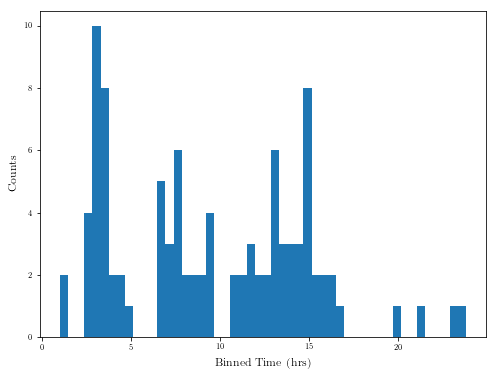

In [80]:
T=2.*np.pi/(omega_best) * 24
# print(T.max(),T.min())

fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()
n,bins,patches=ax.hist(T[(T<25)], bins=50)
print(bins)
print(n)
ax.set_xlabel("Binned Time (hrs)",size=12)
ax.set_ylabel("Counts",size=12)

3. Generate two 6-panel figures analogous to Figure 10.17, for 6 stars (arbitrarily chosen) from the highest and second highest peak, respectivelly. Comment on (dis)similarities of the two plots and of stars within each plot.

__ANSWER3__: `HIGHGEST PEAK (HP) and SECOND HIGHEST PEAK (SHP) plots are distinctively different. In the sense that, HP plot has a single peak and is very well explained by a single sinusoidal function in the fourier seris usually - implying that there is only one oscillation mode associated. But for SHP, the plot shows that there are multiple bumps/peaks which therefore might need multiple sine curve composites, implying there are multiple multiple oscillation modes associated with these kind of stars.`

`All SHP light curve falls gradually and rises rapidly over a single period.`
`Whereas HP light curves rise and fall with the same rate.`

 - omega_0 = 49.51997338
 - omega_0 = 61.22448511
 - omega_0 = 44.99004599
 - omega_0 = 44.9335195
 - omega_0 = 50.68860719
 - omega_0 = 47.11060632


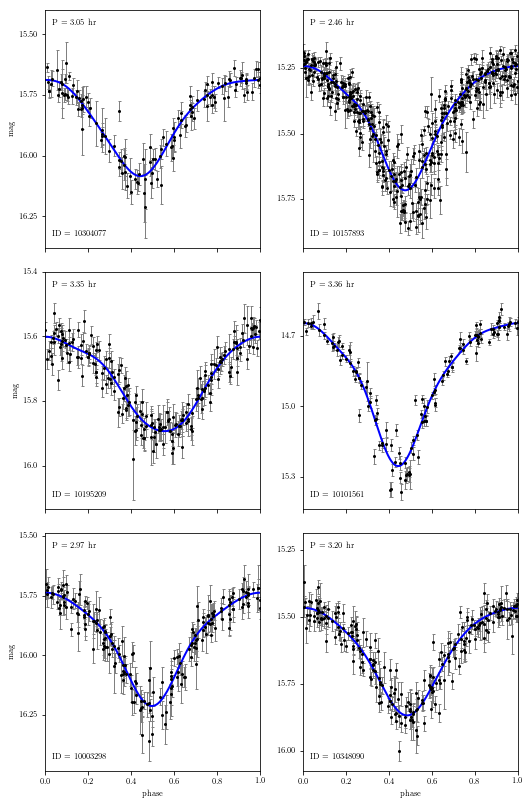

 - omega_0 = 13.41527457
 - omega_0 = 13.29064813
 - omega_0 = 12.82060684
 - omega_0 = 13.77956116
 - omega_0 = 13.70483127
 - omega_0 = 12.65024236


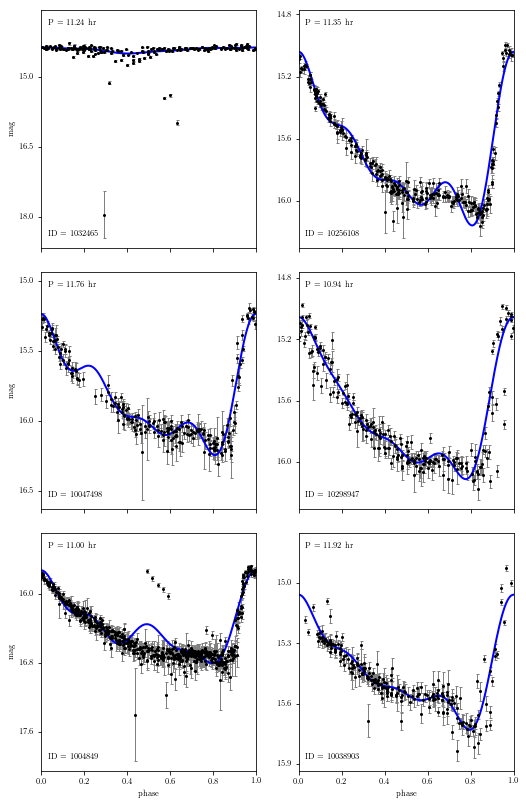

In [106]:
max1 = np.arange(np.argmax(n)-4,np.argmax(n)+4)
# print(max1)
range_max1=np.where((T>bins[max1.min()]) & (T<bins[max1.max()+1]))[0] #location of range corresponding to first peak
ind_max1 = random.sample(range(len(range_max1)),6)
ids_max1=data.ids[range_max1[ind_max1]]
# print(ids_max1)
myPlot_max1=plot_lightcurves(results,ids_max1)
plt.show()

ntemp=np.copy(n) 
ntemp[max1]=0 #masking previously extracted bins to avoid finding second maximum from it
max2=np.arange(np.argmax(ntemp)-9,np.argmax(ntemp)+4) #manually defining the range corresponding to second peak 
# print(max2)

range_max2=np.where((T>bins[max2.min()]) & (T<bins[max2.max()+1]))[0] #location of range corresponding to second peak

ind_max2 = random.sample(range(len(range_max2)),6)
ids_max2=data.ids[range_max2[ind_max2]]
# print(ids_max2)
myPlot_max1=plot_lightcurves(results,ids_max2)
plt.show()

4. EXTRA CREDIT: compute the histogram in #2 for ALL (about 7000) stars in the data set, not just the first 100 (note: this will take a while - on a Mac Pro about 5 hours). Modify the histogram range and bin sizes as needed to bring out the features (clusters) in the data. Comment on differences compared to the 100-star case. Extra credit 20% of this homework!

__ANSWER4:__ `We can see four distinct peaks in the histogram for 7000 stars, The fourth peak was not very clear in the histogram of the 100 star case. This new peak around 24hrs seems like an anomaly, as the distribution is too narrow to be a real indication of any class of star.`

In [6]:
results_all = compute_best_frequencies(data.ids[:])

1 - computing power for 10003298 (196 points)
2 - computing power for 10004892 (269 points)
3 - computing power for 10013411 (170 points)
4 - computing power for 10021274 (214 points)
5 - computing power for 10022663 (246 points)
6 - computing power for 10025796 (233 points)
7 - computing power for 10028253 (38 points)
8 - computing power for 10030349 (255 points)
9 - computing power for 10032668 (193 points)
10 - computing power for 10038903 (227 points)
11 - computing power for 10040133 (257 points)
12 - computing power for 10040491 (228 points)
13 - computing power for 10045187 (229 points)
14 - computing power for 10045615 (101 points)
15 - computing power for 10046720 (136 points)
16 - computing power for 10047498 (221 points)
17 - computing power for 1004849 (607 points)
18 - computing power for 1005497 (607 points)
19 - computing power for 10064356 (291 points)
20 - computing power for 10066464 (274 points)
21 - computing power for 10071455 (269 points)
22 - computing power for 

175 - computing power for 10581384 (105 points)
176 - computing power for 10582011 (208 points)
177 - computing power for 10593916 (437 points)
178 - computing power for 10594697 (316 points)
179 - computing power for 1059786 (549 points)
180 - computing power for 10598277 (422 points)
181 - computing power for 10601348 (430 points)
182 - computing power for 10606433 (142 points)
183 - computing power for 10606728 (409 points)
184 - computing power for 10609185 (424 points)
185 - computing power for 10614690 (221 points)
186 - computing power for 10617428 (203 points)
187 - computing power for 10619285 (218 points)
188 - computing power for 10623386 (385 points)
189 - computing power for 10628913 (345 points)
190 - computing power for 10634459 (203 points)
191 - computing power for 10642127 (210 points)
192 - computing power for 10647040 (383 points)
193 - computing power for 10648348 (213 points)
194 - computing power for 10650256 (165 points)
195 - computing power for 10655343 (240 p

347 - computing power for 1112498 (541 points)
348 - computing power for 11125438 (312 points)
349 - computing power for 11126244 (230 points)
350 - computing power for 1113422 (384 points)
351 - computing power for 11134934 (261 points)
352 - computing power for 11135399 (240 points)
353 - computing power for 11135735 (247 points)
354 - computing power for 11139551 (212 points)
355 - computing power for 11142378 (226 points)
356 - computing power for 11143366 (241 points)
357 - computing power for 11147762 (298 points)
358 - computing power for 11149695 (202 points)
359 - computing power for 11150338 (217 points)
360 - computing power for 11151226 (216 points)
361 - computing power for 11152402 (199 points)
362 - computing power for 11155096 (164 points)
363 - computing power for 11157808 (173 points)
364 - computing power for 11164967 (204 points)
365 - computing power for 11166089 (220 points)
366 - computing power for 11175527 (200 points)
367 - computing power for 11178050 (215 po

519 - computing power for 11722875 (206 points)
520 - computing power for 11726211 (201 points)
521 - computing power for 11726604 (205 points)
522 - computing power for 1172677 (313 points)
523 - computing power for 11734279 (216 points)
524 - computing power for 11735815 (160 points)
525 - computing power for 11739544 (278 points)
526 - computing power for 11741466 (233 points)
527 - computing power for 11748489 (261 points)
528 - computing power for 11752199 (257 points)
529 - computing power for 11754294 (242 points)
530 - computing power for 11762571 (230 points)
531 - computing power for 11763086 (250 points)
532 - computing power for 11779831 (244 points)
533 - computing power for 11780577 (211 points)
534 - computing power for 11781491 (210 points)
535 - computing power for 11782815 (171 points)
536 - computing power for 11785270 (112 points)
537 - computing power for 11790064 (233 points)
538 - computing power for 11793018 (65 points)
539 - computing power for 1179977 (254 poi

691 - computing power for 12355665 (247 points)
692 - computing power for 12358313 (226 points)
693 - computing power for 12359105 (215 points)
694 - computing power for 12364597 (111 points)
695 - computing power for 12365386 (211 points)
696 - computing power for 12368648 (235 points)
697 - computing power for 12369016 (190 points)
698 - computing power for 12369963 (229 points)
699 - computing power for 12375443 (236 points)
700 - computing power for 12382106 (208 points)
701 - computing power for 12383709 (201 points)
702 - computing power for 12385133 (186 points)
703 - computing power for 12385218 (218 points)
704 - computing power for 12389018 (192 points)
705 - computing power for 12389449 (196 points)
706 - computing power for 12390014 (156 points)
707 - computing power for 12390274 (159 points)
708 - computing power for 12392541 (187 points)
709 - computing power for 12402647 (188 points)
710 - computing power for 12405343 (154 points)
711 - computing power for 1240665 (468 p

863 - computing power for 12895722 (233 points)
864 - computing power for 12896156 (201 points)
865 - computing power for 1289914 (310 points)
866 - computing power for 12901802 (204 points)
867 - computing power for 12905848 (178 points)
868 - computing power for 12936747 (229 points)
869 - computing power for 12938570 (233 points)
870 - computing power for 12943921 (203 points)
871 - computing power for 12946318 (246 points)
872 - computing power for 12947453 (238 points)
873 - computing power for 12949815 (240 points)
874 - computing power for 12957445 (238 points)
875 - computing power for 12960704 (207 points)
876 - computing power for 12963023 (250 points)
877 - computing power for 12968612 (176 points)
878 - computing power for 12970590 (188 points)
879 - computing power for 1297279 (261 points)
880 - computing power for 12976843 (150 points)
881 - computing power for 12978739 (149 points)
882 - computing power for 12985545 (185 points)
883 - computing power for 12987306 (268 po

1034 - computing power for 1348385 (187 points)
1035 - computing power for 13488714 (195 points)
1036 - computing power for 13498334 (185 points)
1037 - computing power for 13504794 (154 points)
1038 - computing power for 13506406 (165 points)
1039 - computing power for 13509076 (180 points)
1040 - computing power for 13514372 (187 points)
1041 - computing power for 13515042 (182 points)
1042 - computing power for 13515755 (186 points)
1043 - computing power for 13517578 (228 points)
1044 - computing power for 13520331 (229 points)
1045 - computing power for 13529973 (212 points)
1046 - computing power for 13531485 (157 points)
1047 - computing power for 13532661 (225 points)
1048 - computing power for 13534640 (224 points)
1049 - computing power for 13538276 (236 points)
1050 - computing power for 1354474 (165 points)
1051 - computing power for 13545282 (214 points)
1052 - computing power for 13547350 (202 points)
1053 - computing power for 13564163 (177 points)
1054 - computing power

1202 - computing power for 14140470 (225 points)
1203 - computing power for 141414 (278 points)
1204 - computing power for 14142720 (223 points)
1205 - computing power for 14143062 (201 points)
1206 - computing power for 14144390 (218 points)
1207 - computing power for 14144427 (204 points)
1208 - computing power for 14148882 (233 points)
1209 - computing power for 14149087 (239 points)
1210 - computing power for 14149757 (233 points)
1211 - computing power for 14151896 (234 points)
1212 - computing power for 14153847 (226 points)
1213 - computing power for 14153889 (228 points)
1214 - computing power for 14155360 (191 points)
1215 - computing power for 14155972 (45 points)
1216 - computing power for 14160184 (198 points)
1217 - computing power for 14160259 (201 points)
1218 - computing power for 14160995 (201 points)
1219 - computing power for 14167663 (189 points)
1220 - computing power for 14167875 (199 points)
1221 - computing power for 14168345 (213 points)
1222 - computing power 

1370 - computing power for 14619227 (183 points)
1371 - computing power for 1462162 (405 points)
1372 - computing power for 14622972 (183 points)
1373 - computing power for 14628814 (172 points)
1374 - computing power for 14628886 (164 points)
1375 - computing power for 14630602 (184 points)
1376 - computing power for 14635658 (186 points)
1377 - computing power for 14639359 (186 points)
1378 - computing power for 14644803 (192 points)
1379 - computing power for 14647892 (205 points)
1380 - computing power for 1464881 (488 points)
1381 - computing power for 14649907 (145 points)
1382 - computing power for 146540 (151 points)
1383 - computing power for 14654855 (214 points)
1384 - computing power for 14659554 (232 points)
1385 - computing power for 14665097 (194 points)
1386 - computing power for 14668373 (190 points)
1387 - computing power for 146770 (275 points)
1388 - computing power for 14682208 (202 points)
1389 - computing power for 1468233 (256 points)
1390 - computing power for 

1538 - computing power for 15036339 (116 points)
1539 - computing power for 15036436 (163 points)
1540 - computing power for 15036797 (222 points)
1541 - computing power for 15047851 (185 points)
1542 - computing power for 15050624 (185 points)
1543 - computing power for 15052183 (54 points)
1544 - computing power for 15052210 (205 points)
1545 - computing power for 15059003 (209 points)
1546 - computing power for 15059463 (219 points)
1547 - computing power for 15060955 (211 points)
1548 - computing power for 15064057 (46 points)
1549 - computing power for 15066171 (211 points)
1550 - computing power for 1506638 (301 points)
1551 - computing power for 15067089 (193 points)
1552 - computing power for 15067253 (210 points)
1553 - computing power for 15067370 (227 points)
1554 - computing power for 15071248 (222 points)
1555 - computing power for 15071715 (265 points)
1556 - computing power for 15072375 (170 points)
1557 - computing power for 15074884 (263 points)
1558 - computing power 

1706 - computing power for 15420439 (137 points)
1707 - computing power for 15426512 (232 points)
1708 - computing power for 15435803 (170 points)
1709 - computing power for 15444832 (179 points)
1710 - computing power for 15449045 (173 points)
1711 - computing power for 15450888 (213 points)
1712 - computing power for 15456038 (64 points)
1713 - computing power for 15456241 (216 points)
1714 - computing power for 15456728 (174 points)
1715 - computing power for 15456845 (196 points)
1716 - computing power for 15459636 (194 points)
1717 - computing power for 154606 (281 points)
1718 - computing power for 15469151 (229 points)
1719 - computing power for 15469681 (214 points)
1720 - computing power for 15476260 (232 points)
1721 - computing power for 15478003 (218 points)
1722 - computing power for 15480369 (184 points)
1723 - computing power for 15493890 (200 points)
1724 - computing power for 15494401 (182 points)
1725 - computing power for 15495473 (198 points)
1726 - computing power 

1874 - computing power for 15843279 (138 points)
1875 - computing power for 15847031 (205 points)
1876 - computing power for 1584721 (426 points)
1877 - computing power for 15851627 (212 points)
1878 - computing power for 1585633 (432 points)
1879 - computing power for 1586050 (268 points)
1880 - computing power for 15862122 (188 points)
1881 - computing power for 15862277 (180 points)
1882 - computing power for 1586584 (408 points)
1883 - computing power for 15866286 (224 points)
1884 - computing power for 15871857 (202 points)
1885 - computing power for 158779 (293 points)
1886 - computing power for 15884587 (260 points)
1887 - computing power for 15885653 (213 points)
1888 - computing power for 15888421 (201 points)
1889 - computing power for 15891670 (232 points)
1890 - computing power for 15895964 (162 points)
1891 - computing power for 15896865 (238 points)
1892 - computing power for 15897021 (53 points)
1893 - computing power for 15898895 (179 points)
1894 - computing power for 

2042 - computing power for 16305254 (161 points)
2043 - computing power for 16306976 (209 points)
2044 - computing power for 16307310 (126 points)
2045 - computing power for 16308462 (174 points)
2046 - computing power for 16310920 (198 points)
2047 - computing power for 16318334 (214 points)
2048 - computing power for 16318648 (213 points)
2049 - computing power for 16319448 (196 points)
2050 - computing power for 16321584 (204 points)
2051 - computing power for 16322075 (194 points)
2052 - computing power for 16322742 (210 points)
2053 - computing power for 16324288 (207 points)
2054 - computing power for 16327642 (180 points)
2055 - computing power for 16330918 (220 points)
2056 - computing power for 16332922 (223 points)
2057 - computing power for 16338656 (142 points)
2058 - computing power for 1634230 (273 points)
2059 - computing power for 16344733 (227 points)
2060 - computing power for 1634758 (230 points)
2061 - computing power for 16348133 (199 points)
2062 - computing power

2210 - computing power for 16715726 (208 points)
2211 - computing power for 16718769 (204 points)
2212 - computing power for 16719500 (199 points)
2213 - computing power for 16726633 (196 points)
2214 - computing power for 16728832 (198 points)
2215 - computing power for 16730714 (214 points)
2216 - computing power for 16732110 (222 points)
2217 - computing power for 16733767 (232 points)
2218 - computing power for 16733833 (204 points)
2219 - computing power for 16734502 (203 points)
2220 - computing power for 16734516 (202 points)
2221 - computing power for 16737506 (191 points)
2222 - computing power for 16742987 (177 points)
2223 - computing power for 16744006 (208 points)
2224 - computing power for 16744355 (207 points)
2225 - computing power for 16748057 (189 points)
2226 - computing power for 16750709 (112 points)
2227 - computing power for 16759604 (222 points)
2228 - computing power for 16760209 (220 points)
2229 - computing power for 16761690 (210 points)
2230 - computing pow

2378 - computing power for 17342857 (232 points)
2379 - computing power for 17351801 (310 points)
2380 - computing power for 1735658 (547 points)
2381 - computing power for 17359449 (272 points)
2382 - computing power for 1736308 (372 points)
2383 - computing power for 17370336 (526 points)
2384 - computing power for 17373195 (504 points)
2385 - computing power for 17386926 (266 points)
2386 - computing power for 17388305 (241 points)
2387 - computing power for 17389083 (207 points)
2388 - computing power for 17403485 (185 points)
2389 - computing power for 17404363 (194 points)
2390 - computing power for 17413648 (161 points)
2391 - computing power for 17418926 (195 points)
2392 - computing power for 17419718 (209 points)
2393 - computing power for 17429661 (218 points)
2394 - computing power for 17433084 (515 points)
2395 - computing power for 1743519 (167 points)
2396 - computing power for 17436807 (496 points)
2397 - computing power for 174389 (270 points)
2398 - computing power fo

2546 - computing power for 17952641 (162 points)
2547 - computing power for 17958363 (210 points)
2548 - computing power for 17962812 (139 points)
2549 - computing power for 17964029 (195 points)
2550 - computing power for 17968519 (147 points)
2551 - computing power for 17970807 (203 points)
2552 - computing power for 17980151 (204 points)
2553 - computing power for 17981381 (189 points)
2554 - computing power for 17981455 (156 points)
2555 - computing power for 17984561 (146 points)
2556 - computing power for 17985238 (160 points)
2557 - computing power for 17987523 (169 points)
2558 - computing power for 17992460 (224 points)
2559 - computing power for 17992634 (221 points)
2560 - computing power for 17992869 (208 points)
2561 - computing power for 17993985 (170 points)
2562 - computing power for 18001184 (219 points)
2563 - computing power for 18001324 (215 points)
2564 - computing power for 18003132 (221 points)
2565 - computing power for 18003140 (220 points)
2566 - computing pow

2714 - computing power for 18428128 (164 points)
2715 - computing power for 18429098 (179 points)
2716 - computing power for 18430690 (225 points)
2717 - computing power for 18432510 (218 points)
2718 - computing power for 18434633 (154 points)
2719 - computing power for 18434831 (174 points)
2720 - computing power for 18438245 (226 points)
2721 - computing power for 18440016 (214 points)
2722 - computing power for 1844071 (267 points)
2723 - computing power for 1844132 (287 points)
2724 - computing power for 18442127 (224 points)
2725 - computing power for 18442650 (240 points)
2726 - computing power for 18443329 (233 points)
2727 - computing power for 18453306 (189 points)
2728 - computing power for 18457593 (203 points)
2729 - computing power for 18462224 (211 points)
2730 - computing power for 18463550 (219 points)
2731 - computing power for 18464449 (217 points)
2732 - computing power for 18465689 (215 points)
2733 - computing power for 18467764 (228 points)
2734 - computing power

2882 - computing power for 18875199 (228 points)
2883 - computing power for 18876041 (239 points)
2884 - computing power for 18880747 (217 points)
2885 - computing power for 18881768 (186 points)
2886 - computing power for 18886854 (217 points)
2887 - computing power for 18892285 (75 points)
2888 - computing power for 18893679 (223 points)
2889 - computing power for 18895805 (217 points)
2890 - computing power for 18896137 (224 points)
2891 - computing power for 18901395 (154 points)
2892 - computing power for 1890167 (269 points)
2893 - computing power for 18902220 (163 points)
2894 - computing power for 18903377 (159 points)
2895 - computing power for 18905440 (199 points)
2896 - computing power for 18905477 (154 points)
2897 - computing power for 18907145 (177 points)
2898 - computing power for 18907538 (208 points)
2899 - computing power for 18908696 (168 points)
2900 - computing power for 18908764 (209 points)
2901 - computing power for 18909027 (135 points)
2902 - computing power

3050 - computing power for 19431073 (215 points)
3051 - computing power for 19432871 (199 points)
3052 - computing power for 19434679 (137 points)
3053 - computing power for 1943525 (46 points)
3054 - computing power for 19443517 (254 points)
3055 - computing power for 1944537 (305 points)
3056 - computing power for 19448961 (251 points)
3057 - computing power for 19457238 (216 points)
3058 - computing power for 19459131 (215 points)
3059 - computing power for 19466437 (208 points)
3060 - computing power for 19470278 (205 points)
3061 - computing power for 19472283 (194 points)
3062 - computing power for 1947535 (31 points)
3063 - computing power for 19481276 (205 points)
3064 - computing power for 19484227 (207 points)
3065 - computing power for 19488878 (225 points)
3066 - computing power for 19489228 (219 points)
3067 - computing power for 19492872 (201 points)
3068 - computing power for 19494565 (225 points)
3069 - computing power for 19498410 (92 points)
3070 - computing power for

3218 - computing power for 19926728 (136 points)
3219 - computing power for 19927005 (141 points)
3220 - computing power for 19927078 (141 points)
3221 - computing power for 19927168 (141 points)
3222 - computing power for 19927256 (141 points)
3223 - computing power for 19927312 (140 points)
3224 - computing power for 19927391 (140 points)
3225 - computing power for 19927422 (141 points)
3226 - computing power for 19927459 (76 points)
3227 - computing power for 19927546 (140 points)
3228 - computing power for 19927647 (140 points)
3229 - computing power for 19927751 (141 points)
3230 - computing power for 19927835 (140 points)
3231 - computing power for 19928009 (141 points)
3232 - computing power for 19928059 (116 points)
3233 - computing power for 19928075 (141 points)
3234 - computing power for 19928080 (139 points)
3235 - computing power for 19928089 (141 points)
3236 - computing power for 19928095 (140 points)
3237 - computing power for 19928400 (140 points)
3238 - computing powe

3386 - computing power for 20415174 (172 points)
3387 - computing power for 2041979 (276 points)
3388 - computing power for 20424888 (164 points)
3389 - computing power for 20427289 (225 points)
3390 - computing power for 20429469 (117 points)
3391 - computing power for 20431810 (173 points)
3392 - computing power for 20433635 (180 points)
3393 - computing power for 20438561 (195 points)
3394 - computing power for 20441941 (187 points)
3395 - computing power for 2044369 (253 points)
3396 - computing power for 20443973 (194 points)
3397 - computing power for 20453036 (209 points)
3398 - computing power for 20454504 (170 points)
3399 - computing power for 20457074 (160 points)
3400 - computing power for 20457217 (196 points)
3401 - computing power for 20458871 (199 points)
3402 - computing power for 20468321 (172 points)
3403 - computing power for 20470136 (172 points)
3404 - computing power for 20488338 (196 points)
3405 - computing power for 2050107 (190 points)
3406 - computing power 

3554 - computing power for 2103445 (157 points)
3555 - computing power for 21043777 (130 points)
3556 - computing power for 21047116 (164 points)
3557 - computing power for 21049274 (154 points)
3558 - computing power for 21049700 (154 points)
3559 - computing power for 21050373 (154 points)
3560 - computing power for 21051581 (184 points)
3561 - computing power for 21051894 (154 points)
3562 - computing power for 21053033 (154 points)
3563 - computing power for 21053104 (154 points)
3564 - computing power for 21053198 (154 points)
3565 - computing power for 21053199 (154 points)
3566 - computing power for 21055211 (116 points)
3567 - computing power for 21055315 (178 points)
3568 - computing power for 21056450 (177 points)
3569 - computing power for 21062150 (167 points)
3570 - computing power for 21062290 (174 points)
3571 - computing power for 21064056 (174 points)
3572 - computing power for 21072171 (244 points)
3573 - computing power for 21073252 (462 points)
3574 - computing powe

3722 - computing power for 21741619 (260 points)
3723 - computing power for 21742308 (256 points)
3724 - computing power for 21744543 (466 points)
3725 - computing power for 21749428 (497 points)
3726 - computing power for 21749947 (492 points)
3727 - computing power for 21751319 (497 points)
3728 - computing power for 21753974 (260 points)
3729 - computing power for 21759081 (165 points)
3730 - computing power for 21766623 (248 points)
3731 - computing power for 21771914 (241 points)
3732 - computing power for 21774610 (148 points)
3733 - computing power for 2177764 (134 points)
3734 - computing power for 21781999 (188 points)
3735 - computing power for 2178286 (260 points)
3736 - computing power for 21793262 (196 points)
3737 - computing power for 21805414 (568 points)
3738 - computing power for 21805462 (438 points)
3739 - computing power for 21806402 (592 points)
3740 - computing power for 21812840 (478 points)
3741 - computing power for 21816545 (136 points)
3742 - computing power

3890 - computing power for 22518150 (473 points)
3891 - computing power for 22518189 (433 points)
3892 - computing power for 22518636 (546 points)
3893 - computing power for 2252873 (397 points)
3894 - computing power for 22529369 (518 points)
3895 - computing power for 22530805 (459 points)
3896 - computing power for 22531626 (384 points)
3897 - computing power for 22531805 (376 points)
3898 - computing power for 22532172 (417 points)
3899 - computing power for 22542105 (537 points)
3900 - computing power for 22542640 (586 points)
3901 - computing power for 22560414 (594 points)
3902 - computing power for 22571231 (500 points)
3903 - computing power for 22574626 (147 points)
3904 - computing power for 22577615 (524 points)
3905 - computing power for 22578715 (395 points)
3906 - computing power for 22582512 (334 points)
3907 - computing power for 22587580 (311 points)
3908 - computing power for 22587948 (393 points)
3909 - computing power for 22588921 (288 points)
3910 - computing powe

4058 - computing power for 23193507 (559 points)
4059 - computing power for 23199703 (546 points)
4060 - computing power for 23202141 (538 points)
4061 - computing power for 23205293 (552 points)
4062 - computing power for 23206575 (549 points)
4063 - computing power for 23211310 (544 points)
4064 - computing power for 2321260 (247 points)
4065 - computing power for 23214608 (347 points)
4066 - computing power for 23214839 (333 points)
4067 - computing power for 23218013 (337 points)
4068 - computing power for 23223856 (266 points)
4069 - computing power for 23228605 (309 points)
4070 - computing power for 23230392 (294 points)
4071 - computing power for 23230522 (234 points)
4072 - computing power for 23233881 (297 points)
4073 - computing power for 2323566 (224 points)
4074 - computing power for 23241087 (348 points)
4075 - computing power for 23245985 (285 points)
4076 - computing power for 23247678 (306 points)
4077 - computing power for 23247863 (339 points)
4078 - computing power

4226 - computing power for 23634524 (90 points)
4227 - computing power for 23637760 (277 points)
4228 - computing power for 23639331 (261 points)
4229 - computing power for 23640732 (251 points)
4230 - computing power for 23653133 (286 points)
4231 - computing power for 23653629 (299 points)
4232 - computing power for 23654120 (263 points)
4233 - computing power for 23663191 (296 points)
4234 - computing power for 23664166 (550 points)
4235 - computing power for 23672122 (500 points)
4236 - computing power for 23675270 (572 points)
4237 - computing power for 23677497 (234 points)
4238 - computing power for 23680200 (231 points)
4239 - computing power for 23681376 (239 points)
4240 - computing power for 23682494 (224 points)
4241 - computing power for 23682925 (223 points)
4242 - computing power for 23683047 (412 points)
4243 - computing power for 23684949 (240 points)
4244 - computing power for 23686677 (317 points)
4245 - computing power for 23697007 (299 points)
4246 - computing powe

4394 - computing power for 24139748 (142 points)
4395 - computing power for 2414841 (522 points)
4396 - computing power for 24151584 (516 points)
4397 - computing power for 24153038 (611 points)
4398 - computing power for 24153314 (180 points)
4399 - computing power for 24160323 (510 points)
4400 - computing power for 24163451 (36 points)
4401 - computing power for 24164684 (161 points)
4402 - computing power for 24166005 (166 points)
4403 - computing power for 24168237 (130 points)
4404 - computing power for 24170603 (521 points)
4405 - computing power for 24185328 (411 points)
4406 - computing power for 24191273 (45 points)
4407 - computing power for 24192071 (570 points)
4408 - computing power for 24192279 (596 points)
4409 - computing power for 2419376 (391 points)
4410 - computing power for 24198561 (236 points)
4411 - computing power for 24199965 (425 points)
4412 - computing power for 24203529 (453 points)
4413 - computing power for 24205854 (443 points)
4414 - computing power f

4562 - computing power for 24710483 (346 points)
4563 - computing power for 24711318 (366 points)
4564 - computing power for 24718485 (501 points)
4565 - computing power for 24730625 (326 points)
4566 - computing power for 24732024 (504 points)
4567 - computing power for 24737701 (498 points)
4568 - computing power for 24739516 (79 points)
4569 - computing power for 24753228 (473 points)
4570 - computing power for 2475488 (288 points)
4571 - computing power for 2475766 (290 points)
4572 - computing power for 24770128 (474 points)
4573 - computing power for 24770181 (309 points)
4574 - computing power for 24776891 (481 points)
4575 - computing power for 24790990 (509 points)
4576 - computing power for 24794490 (317 points)
4577 - computing power for 24796756 (366 points)
4578 - computing power for 24802462 (499 points)
4579 - computing power for 24810052 (483 points)
4580 - computing power for 24810840 (511 points)
4581 - computing power for 24815070 (506 points)
4582 - computing power 

4730 - computing power for 25272893 (191 points)
4731 - computing power for 25274685 (174 points)
4732 - computing power for 25276237 (162 points)
4733 - computing power for 25278645 (133 points)
4734 - computing power for 25280016 (129 points)
4735 - computing power for 25282580 (162 points)
4736 - computing power for 25284109 (190 points)
4737 - computing power for 25286374 (181 points)
4738 - computing power for 25287715 (184 points)
4739 - computing power for 25288349 (192 points)
4740 - computing power for 25295492 (163 points)
4741 - computing power for 25296979 (189 points)
4742 - computing power for 25302112 (170 points)
4743 - computing power for 25305517 (170 points)
4744 - computing power for 25308072 (142 points)
4745 - computing power for 25310945 (163 points)
4746 - computing power for 25320424 (173 points)
4747 - computing power for 2532058 (271 points)
4748 - computing power for 2532118 (273 points)
4749 - computing power for 25327408 (147 points)
4750 - computing power

4901 - computing power for 2989064 (269 points)
4902 - computing power for 2992494 (83 points)
4903 - computing power for 2997346 (201 points)
4904 - computing power for 3001254 (227 points)
4905 - computing power for 3011464 (135 points)
4906 - computing power for 3012669 (141 points)
4907 - computing power for 301278 (254 points)
4908 - computing power for 3014133 (126 points)
4909 - computing power for 3015249 (192 points)
4910 - computing power for 3016980 (137 points)
4911 - computing power for 3026086 (552 points)
4912 - computing power for 3036295 (502 points)
4913 - computing power for 303860 (280 points)
4914 - computing power for 3044799 (317 points)
4915 - computing power for 3045044 (358 points)
4916 - computing power for 3047651 (319 points)
4917 - computing power for 3048546 (291 points)
4918 - computing power for 3051376 (237 points)
4919 - computing power for 3056354 (463 points)
4920 - computing power for 3056979 (496 points)
4921 - computing power for 3062621 (526 poi

5073 - computing power for 3540363 (295 points)
5074 - computing power for 3540655 (271 points)
5075 - computing power for 3541085 (288 points)
5076 - computing power for 3541889 (208 points)
5077 - computing power for 3545171 (272 points)
5078 - computing power for 3545983 (251 points)
5079 - computing power for 3549697 (131 points)
5080 - computing power for 3549974 (229 points)
5081 - computing power for 3550230 (132 points)
5082 - computing power for 3551306 (261 points)
5083 - computing power for 3553016 (133 points)
5084 - computing power for 3553152 (228 points)
5085 - computing power for 3553623 (126 points)
5086 - computing power for 3554106 (133 points)
5087 - computing power for 355767 (180 points)
5088 - computing power for 3558911 (272 points)
5089 - computing power for 3563952 (234 points)
5090 - computing power for 3564769 (238 points)
5091 - computing power for 3570588 (258 points)
5092 - computing power for 3572241 (257 points)
5093 - computing power for 3574728 (278 p

5245 - computing power for 4052762 (252 points)
5246 - computing power for 4056588 (267 points)
5247 - computing power for 4060156 (111 points)
5248 - computing power for 4065540 (286 points)
5249 - computing power for 4071513 (272 points)
5250 - computing power for 407281 (474 points)
5251 - computing power for 4073552 (141 points)
5252 - computing power for 407450 (591 points)
5253 - computing power for 4074683 (105 points)
5254 - computing power for 4075154 (93 points)
5255 - computing power for 4077006 (123 points)
5256 - computing power for 4080898 (217 points)
5257 - computing power for 4101289 (256 points)
5258 - computing power for 4104973 (234 points)
5259 - computing power for 4106551 (266 points)
5260 - computing power for 4108970 (228 points)
5261 - computing power for 4110858 (232 points)
5262 - computing power for 4112202 (238 points)
5263 - computing power for 4115285 (332 points)
5264 - computing power for 4116853 (289 points)
5265 - computing power for 4118255 (230 poi

5417 - computing power for 4602472 (629 points)
5418 - computing power for 4620408 (582 points)
5419 - computing power for 4628138 (572 points)
5420 - computing power for 4630301 (628 points)
5421 - computing power for 4632819 (611 points)
5422 - computing power for 4635162 (627 points)
5423 - computing power for 4635950 (676 points)
5424 - computing power for 4636407 (603 points)
5425 - computing power for 4637684 (633 points)
5426 - computing power for 463861 (313 points)
5427 - computing power for 4639532 (616 points)
5428 - computing power for 4645153 (610 points)
5429 - computing power for 465267 (246 points)
5430 - computing power for 4670587 (555 points)
5431 - computing power for 4672469 (796 points)
5432 - computing power for 4673486 (593 points)
5433 - computing power for 4678343 (405 points)
5434 - computing power for 468106 (318 points)
5435 - computing power for 4685468 (438 points)
5436 - computing power for 4686368 (36 points)
5437 - computing power for 4689389 (366 poin

5589 - computing power for 5283387 (615 points)
5590 - computing power for 5291858 (598 points)
5591 - computing power for 5292538 (583 points)
5592 - computing power for 5294696 (629 points)
5593 - computing power for 5302684 (592 points)
5594 - computing power for 5305589 (119 points)
5595 - computing power for 5307666 (261 points)
5596 - computing power for 5308085 (349 points)
5597 - computing power for 5308380 (487 points)
5598 - computing power for 5308437 (365 points)
5599 - computing power for 531331 (113 points)
5600 - computing power for 5313348 (591 points)
5601 - computing power for 5316376 (342 points)
5602 - computing power for 5323578 (86 points)
5603 - computing power for 5325419 (43 points)
5604 - computing power for 5327549 (365 points)
5605 - computing power for 533976 (236 points)
5606 - computing power for 5341713 (241 points)
5607 - computing power for 5350318 (380 points)
5608 - computing power for 5353858 (342 points)
5609 - computing power for 5354706 (363 poin

5761 - computing power for 5826774 (172 points)
5762 - computing power for 5830262 (197 points)
5763 - computing power for 5832464 (247 points)
5764 - computing power for 5833222 (251 points)
5765 - computing power for 5835578 (154 points)
5766 - computing power for 5835905 (77 points)
5767 - computing power for 5836692 (199 points)
5768 - computing power for 5837620 (226 points)
5769 - computing power for 5838306 (190 points)
5770 - computing power for 5839006 (256 points)
5771 - computing power for 5840211 (204 points)
5772 - computing power for 5840666 (208 points)
5773 - computing power for 5842276 (181 points)
5774 - computing power for 5844704 (197 points)
5775 - computing power for 5849322 (334 points)
5776 - computing power for 5851959 (186 points)
5777 - computing power for 5856462 (202 points)
5778 - computing power for 5859332 (206 points)
5779 - computing power for 5862171 (218 points)
5780 - computing power for 5863483 (183 points)
5781 - computing power for 5876590 (477 p

5933 - computing power for 6319490 (504 points)
5934 - computing power for 6320957 (50 points)
5935 - computing power for 633216 (278 points)
5936 - computing power for 6332356 (58 points)
5937 - computing power for 6341389 (592 points)
5938 - computing power for 6341391 (337 points)
5939 - computing power for 6342127 (591 points)
5940 - computing power for 6342422 (121 points)
5941 - computing power for 6344529 (543 points)
5942 - computing power for 6346477 (603 points)
5943 - computing power for 6348779 (550 points)
5944 - computing power for 6355447 (472 points)
5945 - computing power for 6357779 (574 points)
5946 - computing power for 6358688 (480 points)
5947 - computing power for 636251 (387 points)
5948 - computing power for 6362782 (37 points)
5949 - computing power for 6367473 (349 points)
5950 - computing power for 6370739 (631 points)
5951 - computing power for 6375464 (539 points)
5952 - computing power for 637718 (577 points)
5953 - computing power for 6389240 (473 points

6105 - computing power for 6883239 (305 points)
6106 - computing power for 6885489 (297 points)
6107 - computing power for 6885807 (224 points)
6108 - computing power for 6888272 (302 points)
6109 - computing power for 6895456 (291 points)
6110 - computing power for 6905120 (301 points)
6111 - computing power for 6905999 (327 points)
6112 - computing power for 6906818 (355 points)
6113 - computing power for 6911545 (208 points)
6114 - computing power for 691815 (360 points)
6115 - computing power for 6918683 (268 points)
6116 - computing power for 6919278 (268 points)
6117 - computing power for 6920693 (297 points)
6118 - computing power for 6923201 (230 points)
6119 - computing power for 6925923 (264 points)
6120 - computing power for 6934885 (274 points)
6121 - computing power for 6946184 (270 points)
6122 - computing power for 6946624 (259 points)
6123 - computing power for 695343 (156 points)
6124 - computing power for 6957907 (330 points)
6125 - computing power for 6958952 (432 po

6277 - computing power for 7562636 (237 points)
6278 - computing power for 7567994 (245 points)
6279 - computing power for 7568154 (241 points)
6280 - computing power for 7568311 (252 points)
6281 - computing power for 7576482 (234 points)
6282 - computing power for 7580734 (387 points)
6283 - computing power for 7581097 (321 points)
6284 - computing power for 7585538 (293 points)
6285 - computing power for 7593064 (478 points)
6286 - computing power for 7598693 (104 points)
6287 - computing power for 7601233 (462 points)
6288 - computing power for 7602264 (443 points)
6289 - computing power for 7611453 (220 points)
6290 - computing power for 762911 (294 points)
6291 - computing power for 7630668 (193 points)
6292 - computing power for 7633058 (193 points)
6293 - computing power for 7644672 (273 points)
6294 - computing power for 7649575 (281 points)
6295 - computing power for 7651171 (333 points)
6296 - computing power for 7652271 (289 points)
6297 - computing power for 7657340 (482 p

6449 - computing power for 8140987 (486 points)
6450 - computing power for 8145151 (359 points)
6451 - computing power for 8149230 (449 points)
6452 - computing power for 8153152 (445 points)
6453 - computing power for 8153673 (442 points)
6454 - computing power for 8154564 (455 points)
6455 - computing power for 8168422 (262 points)
6456 - computing power for 8173247 (241 points)
6457 - computing power for 817360 (233 points)
6458 - computing power for 8174779 (268 points)
6459 - computing power for 8175323 (218 points)
6460 - computing power for 8175767 (273 points)
6461 - computing power for 8185242 (297 points)
6462 - computing power for 8189653 (245 points)
6463 - computing power for 8198268 (250 points)
6464 - computing power for 8204721 (199 points)
6465 - computing power for 8207815 (254 points)
6466 - computing power for 8209250 (302 points)
6467 - computing power for 8214374 (264 points)
6468 - computing power for 8215687 (263 points)
6469 - computing power for 8222011 (264 p

6621 - computing power for 872160 (319 points)
6622 - computing power for 872620 (282 points)
6623 - computing power for 8729307 (255 points)
6624 - computing power for 8730052 (280 points)
6625 - computing power for 873025 (279 points)
6626 - computing power for 8733583 (285 points)
6627 - computing power for 8735344 (285 points)
6628 - computing power for 8738578 (277 points)
6629 - computing power for 8742110 (307 points)
6630 - computing power for 8745173 (296 points)
6631 - computing power for 8745394 (317 points)
6632 - computing power for 8747835 (241 points)
6633 - computing power for 8747909 (297 points)
6634 - computing power for 8750069 (340 points)
6635 - computing power for 8750363 (295 points)
6636 - computing power for 8753182 (306 points)
6637 - computing power for 8753791 (337 points)
6638 - computing power for 8756859 (445 points)
6639 - computing power for 8759044 (456 points)
6640 - computing power for 8761079 (470 points)
6641 - computing power for 8761344 (474 poi

6793 - computing power for 92986 (289 points)
6794 - computing power for 9299908 (229 points)
6795 - computing power for 9304586 (272 points)
6796 - computing power for 9306104 (250 points)
6797 - computing power for 9306729 (241 points)
6798 - computing power for 931943 (284 points)
6799 - computing power for 9321631 (267 points)
6800 - computing power for 932204 (276 points)
6801 - computing power for 9325665 (222 points)
6802 - computing power for 9327430 (263 points)
6803 - computing power for 9328902 (261 points)
6804 - computing power for 9329336 (231 points)
6805 - computing power for 9337637 (215 points)
6806 - computing power for 9339352 (217 points)
6807 - computing power for 9340123 (232 points)
6808 - computing power for 9340554 (233 points)
6809 - computing power for 9342307 (183 points)
6810 - computing power for 9343463 (217 points)
6811 - computing power for 9354080 (229 points)
6812 - computing power for 9356158 (278 points)
6813 - computing power for 9357126 (275 poin

6965 - computing power for 9838906 (281 points)
6966 - computing power for 9840932 (273 points)
6967 - computing power for 9843137 (270 points)
6968 - computing power for 9843537 (289 points)
6969 - computing power for 9848891 (345 points)
6970 - computing power for 9852554 (339 points)
6971 - computing power for 9854277 (88 points)
6972 - computing power for 9854852 (294 points)
6973 - computing power for 9855123 (345 points)
6974 - computing power for 985609 (253 points)
6975 - computing power for 9856232 (335 points)
6976 - computing power for 9869345 (181 points)
6977 - computing power for 9869829 (206 points)
6978 - computing power for 9869879 (212 points)
6979 - computing power for 9873464 (178 points)
6980 - computing power for 9887899 (209 points)
6981 - computing power for 9890993 (209 points)
6982 - computing power for 9894898 (193 points)
6983 - computing power for 989567 (283 points)
6984 - computing power for 9902637 (221 points)
6985 - computing power for 9902993 (198 poi

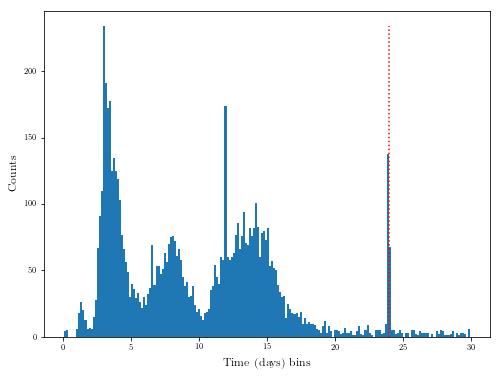

In [108]:
# myprettyplot = plot_lightcurves(results,data.ids[:2])
omega_best_all=np.empty(len(data.ids[:]))
for i in range(len(data.ids[:])):
        # get the best-fit angular frequency
        omega, power = results_all[data.ids[i]]
        omega_best_all[i] = omega[np.argmax(power)]
#         print("%d - omega_0 = %.10g" %(i, omega_best[i]))
        
T_all=2.*np.pi/(omega_best_all) * 24
# print(T.max(),T.min())

fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()
n_all,bins_all,patches_all=ax.hist(T_all[(T_all<30)], histtype='stepfilled',bins=200)
# print(bins)
# print(n)
ax.set_xlabel("Time (days) bins",size=12)
ax.set_ylabel("Counts",size=12)
ax.vlines(24,0,n_all.max(),colors='r',linestyles=':')
plt.show()